The objective of this project is to write code to visualize the impact and analyze the trend rate of infection and recovery as well as make predictions about the number of cases expected a week in the future based on the current trends based on given data about COVID-19 patients.

### Prequels:
- pandas for data collection
- plotly for data visualization
- Facebook prophet library for time series model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('covid19Dataset.csv')
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

### Rename the columns

In [4]:
df = df.rename(columns={'Date':'date',  # for easy use...no particular reason
                      'Province/State':'state',
                      'Country/Region':'country',
                      'Lat':'lat',
                      'Long':'long',
                      'Deaths':'deaths',
                      'Recovered':'recovered',
                      'Active':'active',
                      'Confirmed':'confirmed'})

In [5]:
df.shape

(49068, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       14664 non-null  object 
 1   country     49068 non-null  object 
 2   lat         49068 non-null  float64
 3   long        49068 non-null  float64
 4   date        49068 non-null  object 
 5   confirmed   49068 non-null  int64  
 6   deaths      49068 non-null  int64  
 7   recovered   49068 non-null  int64  
 8   active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

state         34404
country           0
lat               0
long              0
date              0
confirmed         0
deaths            0
recovered         0
active            0
WHO Region        0
dtype: int64

In [8]:
df.head()

state      country       lat       long        date  confirmed  deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   recovered  active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

### Finding the total active cases

In [9]:
df['active'].value_counts()

active
0        14151
1         1792
2         1157
3         1027
5          757
         ...  
23182        1
10153        1
9054         1
61004        1
6791         1
Name: count, Length: 8641, dtype: int64

In [10]:
df['active'] = df['confirmed']-df['deaths']-df['recovered'] # idk why we did this step

In [11]:
df['active']

0           0
1           0
2           0
3           0
4           0
         ... 
49063     117
49064     375
49065      19
49066    1147
49067     365
Name: active, Length: 49068, dtype: int64

In [12]:
df['active'].value_counts()

active
0        14151
1         1792
2         1157
3         1027
5          757
         ...  
23182        1
10153        1
9054         1
61004        1
6791         1
Name: count, Length: 8641, dtype: int64

### To find all the cases on last date of dataset

In [13]:
top = df[df['date'] == df['date'].max()]
top

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

### Grouping data by country

In [14]:
w=top.groupby('country')[['confirmed','active','deaths']].sum().reset_index()
w.head()

# remember top column has data of lastday

country  confirmed  active  deaths
0  Afghanistan      36263    9796    1269
1      Albania       4880    1991     144
2      Algeria      27973    7973    1163
3      Andorra        907      52      52
4       Angola        950     667      41

In [15]:
w.shape

(187, 4)

### Plotting the data on world map

In [16]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

### Visualizing the confirmed cases on all dates

In [17]:


t_cases = df.groupby('date')['confirmed'].sum().reset_index()
t_cases['date'] = pd.to_datetime(t_cases['date'])

t_cases.head()

date  confirmed
0 2020-01-22        555
1 2020-01-23        654
2 2020-01-24        941
3 2020-01-25       1434
4 2020-01-26       2118

Text(0, 0.5, 'Total confimed cases')

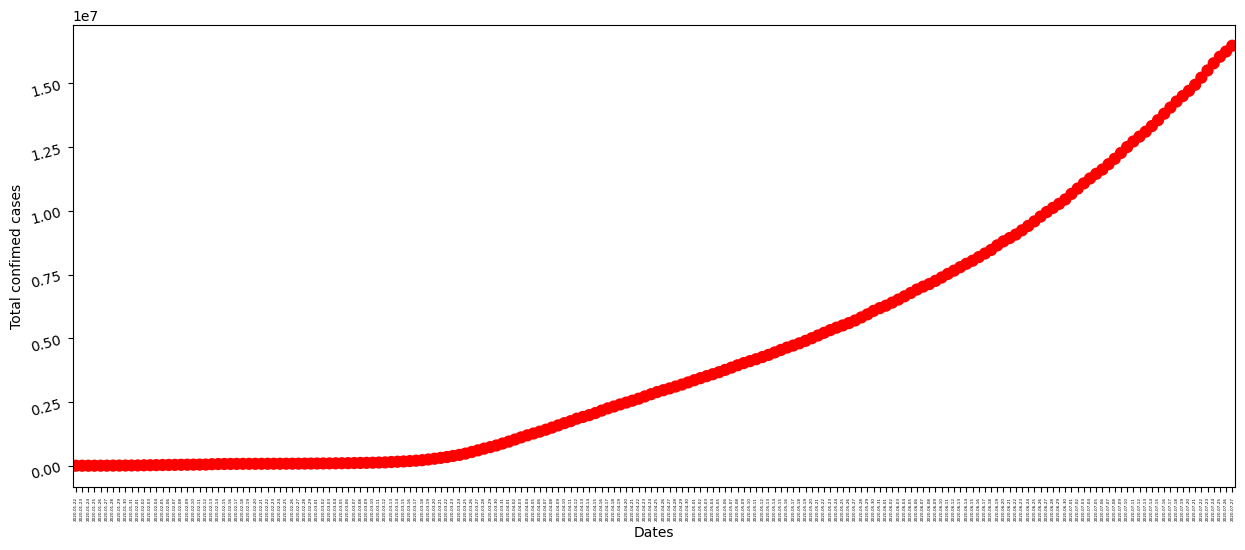

In [18]:
plt.figure(figsize=(15,6))
sns.pointplot(x = t_cases['date'].dt.date,
             y = t_cases['confirmed'],
             color = 'r')
plt.xticks(rotation=90,fontsize=3)
plt.yticks(rotation=15,fontsize=10)
plt.xlabel('Dates')
plt.ylabel('Total confimed cases')

In [19]:
t_cases

date  confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

### Top 20 countries having most active cases on last given day

In [20]:
t_casesActive = top.groupby('country')['active'].sum().sort_values(ascending=False).reset_index().head(20)
t_casesActive

country   active
0               US  2816444
1           Brazil   508116
2            India   495499
3   United Kingdom   254427
4           Russia   201097
5     South Africa   170537
6         Colombia   117163
7           France   108928
8           Canada   107514
9             Peru    98752
10      Bangladesh    97577
11           Spain    93613
12       Argentina    91782
13          Sweden    73695
14     Philippines    53649
15           Egypt    52992
16          Mexico    47657
17     Netherlands    47064
18         Bolivia    47056
19    Saudi Arabia    43238

Text(0.5, 1.0, 'Top 20 countries having most active cases')

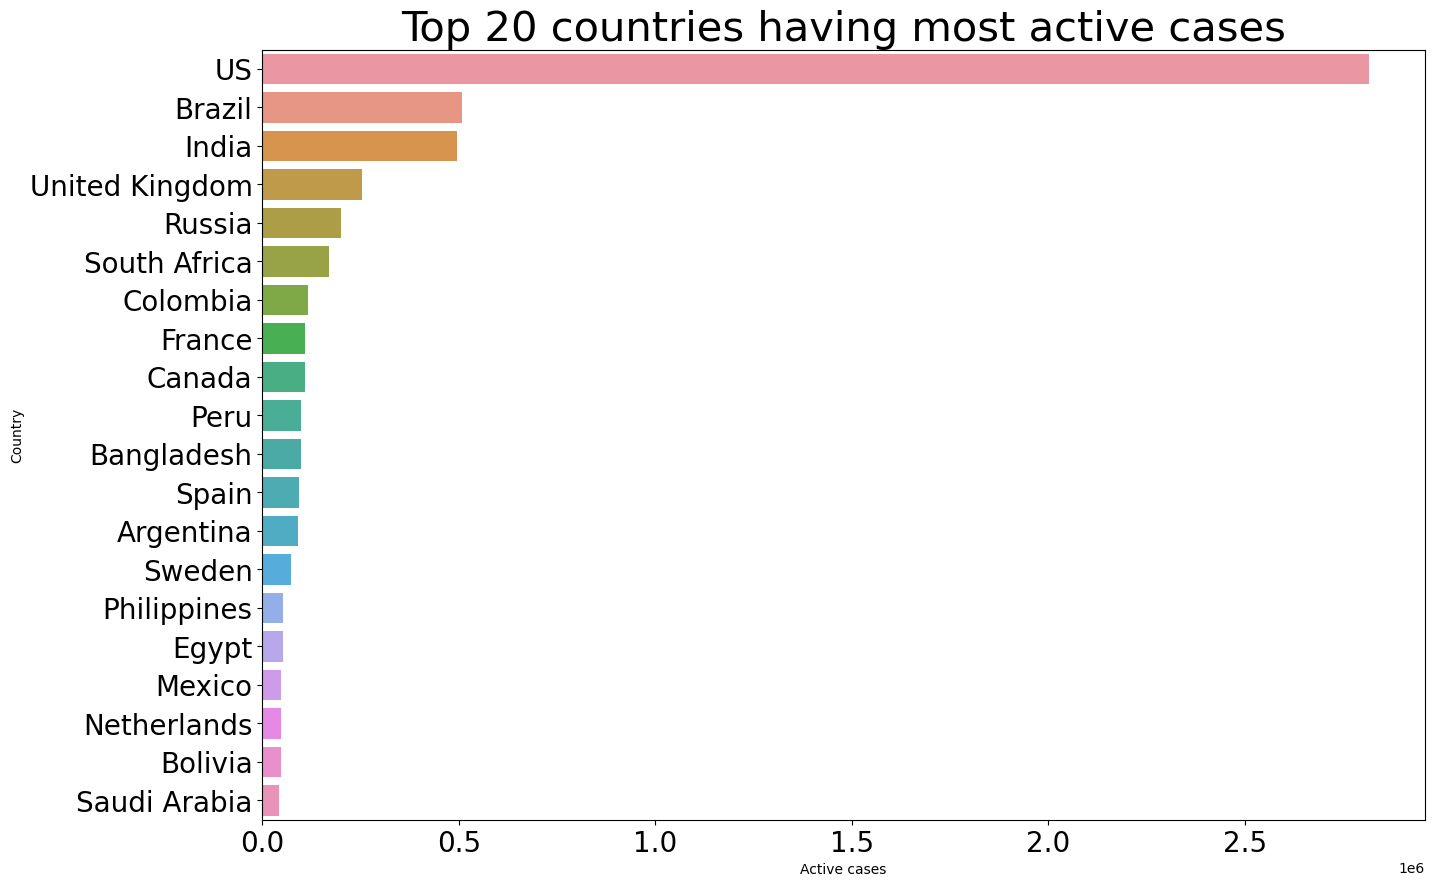

In [21]:
# visualize
plt.figure(figsize=(15,10))

sns.barplot(x=t_casesActive['active'],
           y=t_casesActive['country'])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Active cases')
plt.ylabel('Country')
plt.title('Top 20 countries having most active cases',fontsize=30)

### Top 20 countries with most deaths

In [22]:
top.head(3)

state      country       lat       long        date  confirmed  deaths  \
48807   NaN  Afghanistan  33.93911  67.709953  2020-07-27      36263    1269   
48808   NaN      Albania  41.15330  20.168300  2020-07-27       4880     144   
48809   NaN      Algeria  28.03390   1.659600  2020-07-27      27973    1163   

       recovered  active             WHO Region  
48807      25198    9796  Eastern Mediterranean  
48808       2745    1991                 Europe  
48809      18837    7973                 Africa

In [23]:
t_casesDeath = top.groupby('country')['deaths'].sum().sort_values(ascending=False).reset_index().head(20)
t_casesDeath

country  deaths
0               US  148011
1           Brazil   87618
2   United Kingdom   45844
3           Mexico   44022
4            Italy   35112
5            India   33408
6           France   30212
7            Spain   28432
8             Peru   18418
9             Iran   15912
10          Russia   13334
11         Belgium    9822
12           Chile    9187
13         Germany    9125
14          Canada    8944
15        Colombia    8777
16    South Africa    7067
17     Netherlands    6160
18        Pakistan    5842
19          Sweden    5700

Text(0.5, 1.0, 'Top 20 countries having most death cases')

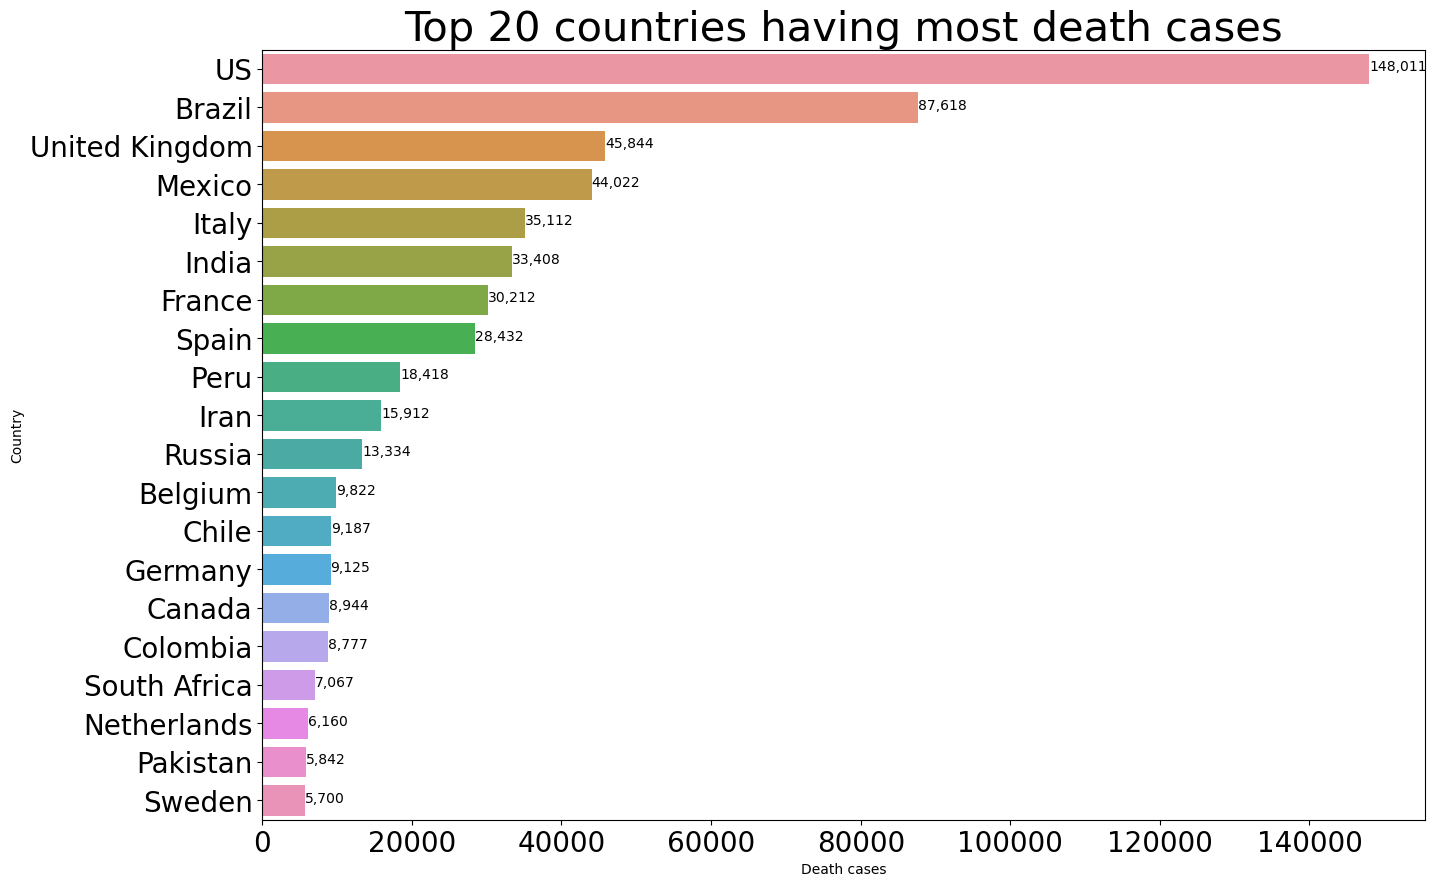

In [24]:
# visualize
plt.figure(figsize=(15,10))

a = sns.barplot(x=t_casesDeath['deaths'],
           y=t_casesDeath['country'])

for i,(value, name) in enumerate(zip(t_casesDeath.deaths, t_casesDeath.country)): # for numbering 
    a.text(value, i-.05, f'{value:,.0f}', size = 10, ha = 'left', va = 'center')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Death cases')
plt.ylabel('Country')
plt.title('Top 20 countries having most death cases',fontsize=30)

### Top 20 countries with most recovered cases

In [25]:
t_casesRecovered = top.groupby('country')['recovered'].sum().sort_values(ascending=False).reset_index().head(20)
t_casesRecovered

country  recovered
0         Brazil    1846641
1             US    1325804
2          India     951166
3         Russia     602249
4          Chile     319954
5         Mexico     303810
6   South Africa     274925
7           Peru     272547
8           Iran     255144
9       Pakistan     241026
10  Saudi Arabia     222936
11        Turkey     210469
12         Italy     198593
13       Germany     190314
14         Spain     150376
15      Colombia     131161
16    Bangladesh     125683
17         Qatar     106328
18        France      81212
19         China      78869

Text(0.5, 1.0, 'Top 20 countries having most recovered cases')

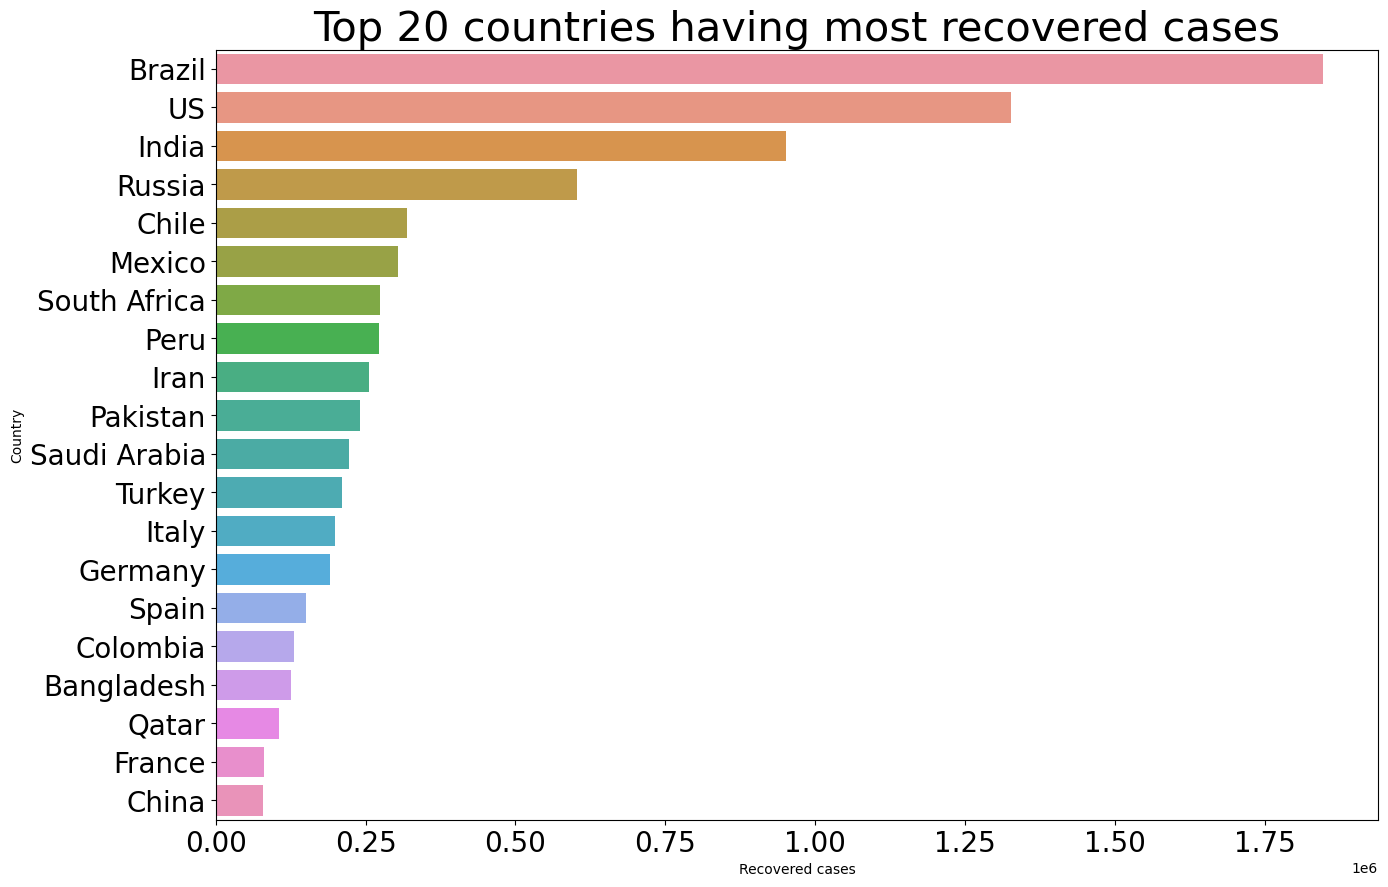

In [26]:
# visualize
plt.figure(figsize=(15,10))

sns.barplot(x=t_casesRecovered['recovered'],
           y=t_casesRecovered['country'])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Recovered cases')
plt.ylabel('Country')
plt.title('Top 20 countries having most recovered cases',fontsize=30)

### Lets take few top countries (Brazil, US, India,Russia) and analyse them all.

In [27]:
Brazil = df[df['country']=='Brazil']
Brazil = Brazil.groupby('date')[['confirmed','deaths','active','recovered']].sum().reset_index()
Brazil.tail()

date  confirmed  deaths  active  recovered
183  2020-07-23    2287475   84082  583080    1620313
184  2020-07-24    2343366   85238  564914    1693214
185  2020-07-25    2394513   86449  522705    1785359
186  2020-07-26    2419091   87004  519174    1812913
187  2020-07-27    2442375   87618  508116    1846641

In [28]:
US = df[df['country']=='US']
US = US.groupby('date')[['confirmed','deaths','active','recovered']].sum().reset_index()
US.tail()

date  confirmed  deaths   active  recovered
183  2020-07-23    4038816  144430  2661117    1233269
184  2020-07-24    4112531  145560  2705347    1261624
185  2020-07-25    4178970  146465  2753091    1279414
186  2020-07-26    4233923  146935  2789125    1297863
187  2020-07-27    4290259  148011  2816444    1325804

In [29]:
India = df[df['country']=='India']
India = India.groupby('date')[['confirmed','deaths','active','recovered']].sum().reset_index()
India.tail()

date  confirmed  deaths  active  recovered
183  2020-07-23    1288108   30601  440298     817209
184  2020-07-24    1337024   31358  456234     849432
185  2020-07-25    1385635   32060  468002     885573
186  2020-07-26    1435616   32771  485277     917568
187  2020-07-27    1480073   33408  495499     951166

In [30]:
Russia = df[df['country']=='Russia']
Russia = Russia.groupby('date')[['confirmed','deaths','active','recovered']].sum().reset_index()
Russia.tail()

date  confirmed  deaths  active  recovered
183  2020-07-23     793720   12873  201552     579295
184  2020-07-24     799499   13026  198745     587728
185  2020-07-25     805332   13172  196096     596064
186  2020-07-26     811073   13249  198652     599172
187  2020-07-27     816680   13334  201097     602249

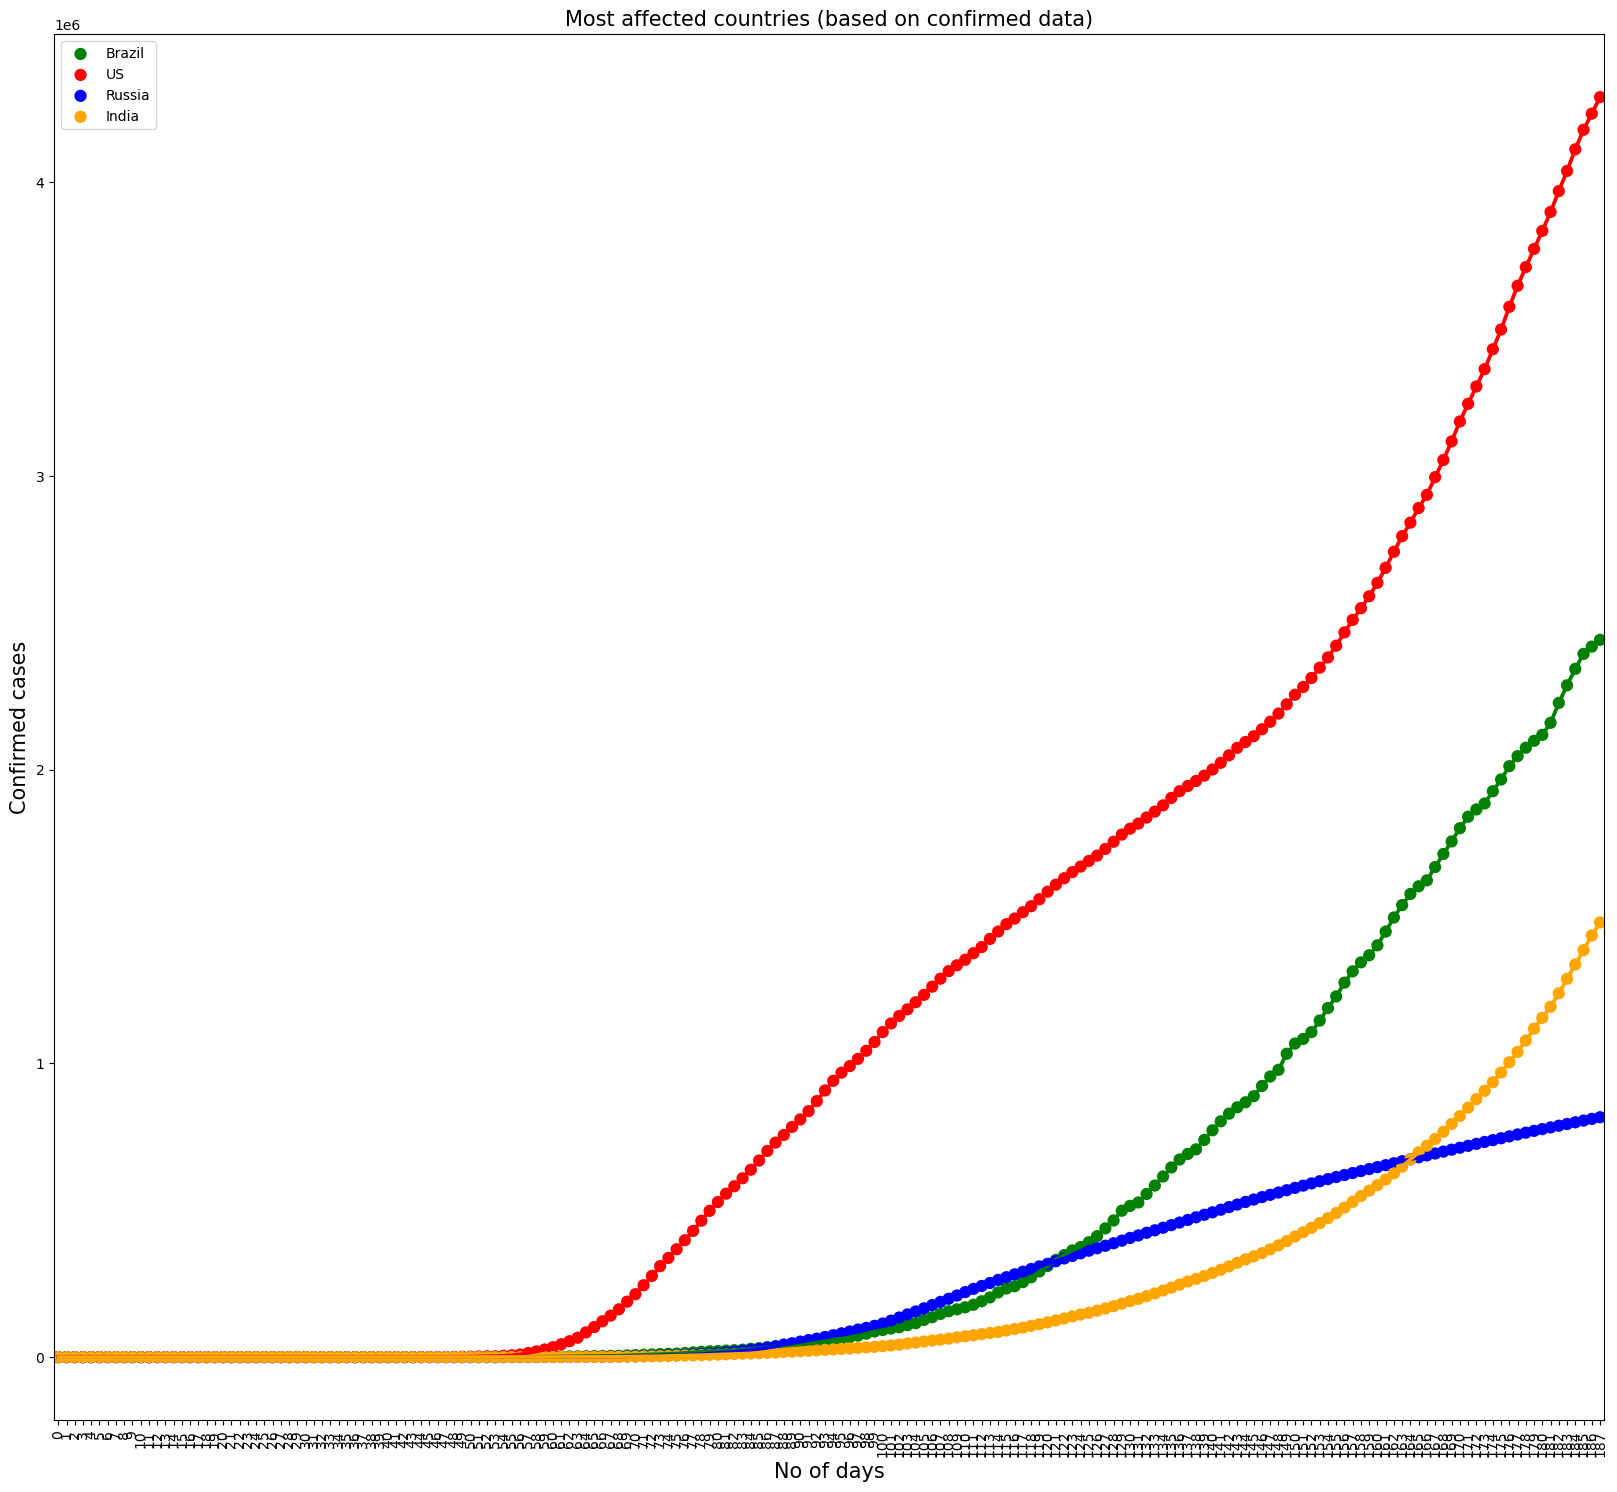

In [31]:
# visualize confirmed cases

plt.figure(figsize=(20,18))

sns.pointplot(data = Brazil, x = Brazil.index, y='confirmed', color='green', label='Brazil')
sns.pointplot(data = US, x = US.index, y='confirmed', color='red', label='US')
sns.pointplot(data = Russia, x = Russia.index, y='confirmed', color='blue', label='Russia')
sns.pointplot(data = India, x = India.index, y='confirmed', color='orange', label='India')

plt.xlabel('No of days',fontsize=15)
plt.ylabel('Confirmed cases',fontsize=15)
plt.title('Most affected countries (based on confirmed data)',fontsize=15)
plt.xticks(rotation=90)

plt.legend()

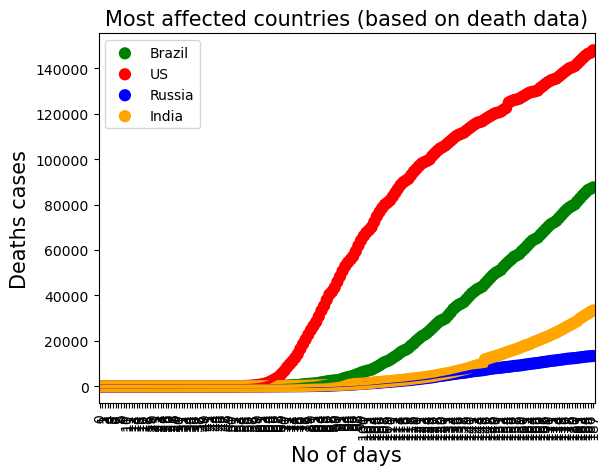

In [32]:
# visualize death cases

sns.pointplot(data = Brazil, x = Brazil.index, y='deaths', color='green', label='Brazil')
sns.pointplot(data = US, x = US.index, y='deaths', color='red', label='US')
sns.pointplot(data = Russia, x = Russia.index, y='deaths', color='blue', label='Russia')
sns.pointplot(data = India, x = India.index, y='deaths', color='orange', label='India')

plt.xlabel('No of days',fontsize=15)
plt.ylabel('Deaths cases',fontsize=15)
plt.title('Most affected countries (based on death data)',fontsize=15)
plt.xticks(rotation=90)

plt.legend()

In [33]:
# visualize recovered cases

sns.pointplot(data = Brazil, x = Brazil.index, y='recovered', color='green', label='Brazil')
sns.pointplot(data = US, x = US.index, y='recovered', color='red', label='US')
sns.pointplot(data = Russia, x = Russia.index, y='recovered', color='blue', label='Russia')
sns.pointplot(data = India, x = India.index, y='recovered', color='orange', label='India')

plt.xlabel('No of days',fontsize=15)
plt.ylabel('Recovered cases',fontsize=15)
plt.title('Most affected countries (based on recovered data)',fontsize=15)
plt.xticks(rotation=90)

plt.legend()

In [34]:
# visualize active cases

sns.pointplot(data = Brazil, x = Brazil.index, y='active', color='green', label='Brazil')
sns.pointplot(data = US, x = US.index, y='active', color='red', label='US')
sns.pointplot(data = Russia, x = Russia.index, y='active', color='blue', label='Russia')
sns.pointplot(data = India, x = India.index, y='active', color='orange', label='India')

plt.xlabel('No of days',fontsize=15)
plt.ylabel('Active cases',fontsize=15)
plt.title('Most affected countries (based on active data)',fontsize=15)
plt.xticks(rotation=90)

plt.legend()

# FORECASTING using FBPROPHET

In [35]:
!pip install prophet

In [36]:
from prophet import Prophet

In [37]:
df.groupby('date')[['lat','long','confirmed','deaths','recovered','active']].sum().head()

lat         long  confirmed  deaths  recovered  active
date                                                                     
2020-01-22  5594.20365  6140.869714        555      17         28     510
2020-01-23  5594.20365  6140.869714        654      18         30     606
2020-01-24  5594.20365  6140.869714        941      26         36     879
2020-01-25  5594.20365  6140.869714       1434      42         39    1353
2020-01-26  5594.20365  6140.869714       2118      56         52    2010

## Extracting the information

In [38]:
total_active = df['active'].sum()
print('Total number of active cases around the world are: ',total_active)

Total number of active cases around the world are:  396715350


In [39]:
total_confirmed = df['confirmed'].sum()
print('Total number of confirmed cases around the world are: ',total_confirmed)

Total number of confirmed cases around the world are:  828508482


In [40]:
total_deaths = df['deaths'].sum()
print('Total number of death cases around the world are: ',total_deaths)

Total number of death cases around the world are:  43384903


In [41]:
total_recovered = df['recovered'].sum()
print('Total number of recovered cases around the world are: ',total_recovered)

Total number of recovered cases around the world are:  388408229


In [42]:
confirmed = df.groupby('date')['confirmed'].sum().reset_index()
deaths = df.groupby('date')['deaths'].sum().reset_index()
recovered = df.groupby('date')['recovered'].sum().reset_index()

In [43]:
confirmed

date  confirmed
0    2020-01-22        555
1    2020-01-23        654
2    2020-01-24        941
3    2020-01-25       1434
4    2020-01-26       2118
..          ...        ...
183  2020-07-23   15510481
184  2020-07-24   15791645
185  2020-07-25   16047190
186  2020-07-26   16251796
187  2020-07-27   16480485

[188 rows x 2 columns]

# Forecast on confirmed cases

In [44]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])  # 'date as ds' and 'confirmed as y'
confirmed.tail()

ds         y
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

In [45]:
m = Prophet(interval_width=0.95)  # this is a prophet forecaster
m.fit(confirmed)   # fit the prophet model with confirmed dataframe

20:25:07 - cmdstanpy - INFO - Chain [1] start processing
20:25:07 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future = m.make_future_dataframe(periods=7,freq='D')  # predict for next 7 days...if month then freq = 'M'
future.tail(10)

ds
185 2020-07-25
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [47]:
forecast = m.predict(future)  # predict on the dataframe future
forecast[['ds','yhat','yhat_lower','yhat_upper']].head(10)

ds          yhat     yhat_lower     yhat_upper
0 2020-01-22 -20342.396024 -175846.656075  147041.066828
1 2020-01-23  -7746.625412 -161016.012934  156566.942227
2 2020-01-24   6123.967440 -151853.301136  163140.401076
3 2020-01-25  12379.384088 -141111.369886  177124.509603
4 2020-01-26   8615.766111 -146578.908908  170613.203853
5 2020-01-27   1941.698111 -157882.242686  153733.300368
6 2020-01-28 -10007.605083 -161894.800947  143626.304117
7 2020-01-29  -1523.241466 -160610.326617  176325.741985
8 2020-01-30  11072.520941 -147152.647225  171143.599817
9 2020-01-31  24943.105585 -131827.724395  173853.714876

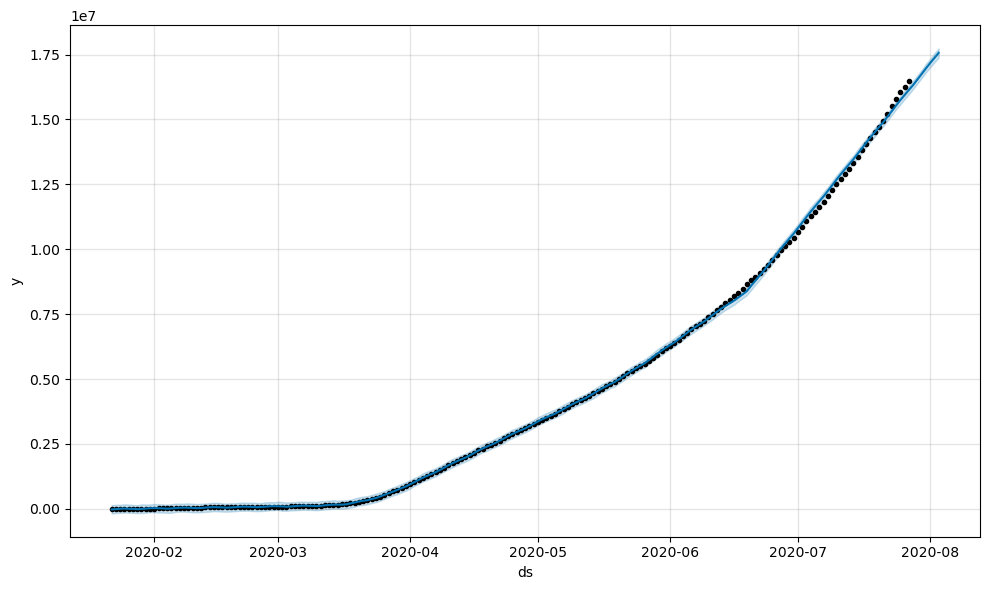

In [48]:
# plot the forecast 

confirmed_forecast_plot = m.plot(forecast)  # model plot on forecast dataframe ... plot the prophet forecast

In [49]:
forecast.tail(10)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
185 2020-07-25  1.572807e+07  1.557429e+07  1.588144e+07  1.572807e+07   
186 2020-07-26  1.593231e+07  1.577872e+07  1.610483e+07  1.593231e+07   
187 2020-07-27  1.613655e+07  1.596984e+07  1.628433e+07  1.613655e+07   
188 2020-07-28  1.634079e+07  1.616698e+07  1.649476e+07  1.633671e+07   
189 2020-07-29  1.654504e+07  1.638067e+07  1.669522e+07  1.653251e+07   
190 2020-07-30  1.674928e+07  1.659384e+07  1.690771e+07  1.672304e+07   
191 2020-07-31  1.695352e+07  1.681125e+07  1.714085e+07  1.690904e+07   
192 2020-08-01  1.715776e+07  1.700863e+07  1.733278e+07  1.709740e+07   
193 2020-08-02  1.736200e+07  1.719662e+07  1.755116e+07  1.728456e+07   
194 2020-08-03  1.756624e+07  1.737771e+07  1.773658e+07  1.747162e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
185  1.572807e+07    13670.214198          13670.214198          13670.214198   
186  1.593231e+07     7218.144397           7218.144397           7218.144397   
187  1.613655e+07    -2144.375427          -2144.375427          -2144.375427   
188  1.634419e+07   -16782.130444         -16782.130444         -16782.130444   
189  1.655751e+07   -10986.210444         -10986.210444         -10986.210444   
190  1.677754e+07    -1078.891654          -1078.891654          -1078.891654   
191  1.699997e+07    10103.249373          10103.249373          10103.249373   
192  1.722135e+07    13670.214198          13670.214198          13670.214198   
193  1.745413e+07     7218.144397           7218.144397           7218.144397   
194  1.768204e+07    -2144.375427          -2144.375427          -2144.375427   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
185  13670.214198  13670.214198  13670.214198                   0.0   
186   7218.144397   7218.144397   7218.144397                   0.0   
187  -2144.375427  -2144.375427  -2144.375427                   0.0   
188 -16782.130444 -16782.130444 -16782.130444                   0.0   
189 -10986.210444 -10986.210444 -10986.210444                   0.0   
190  -1078.891654  -1078.891654  -1078.891654                   0.0   
191  10103.249373  10103.249373  10103.249373                   0.0   
192  13670.214198  13670.214198  13670.214198                   0.0   
193   7218.144397   7218.144397   7218.144397                   0.0   
194  -2144.375427  -2144.375427  -2144.375427                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
185                         0.0                         0.0  1.574174e+07  
186                         0.0                         0.0  1.593953e+07  
187                         0.0                         0.0  1.613441e+07  
188                         0.0                         0.0  1.632401e+07  
189                         0.0                         0.0  1.653405e+07  
190                         0.0                         0.0  1.674820e+07  
191                         0.0                         0.0  1.696362e+07  
192                         0.0                         0.0  1.717143e+07  
193                         0.0                         0.0  1.736922e+07  
194                         0.0                         0.0  1.756410e+07

In [50]:
# plot the components of the forecast

m.plot_components(forecast)

## Forecasting for death cases

In [51]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

m = Prophet(interval_width=0.95)  
m.fit(deaths) 

future = m.make_future_dataframe(periods=7,freq='D')

forecast = m.predict(future)  
forecast[['ds','yhat','yhat_lower','yhat_upper']].head(10)

20:25:09 - cmdstanpy - INFO - Chain [1] start processing
20:25:09 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
0 2020-01-22  -713.145753 -3726.672483  2118.065128
1 2020-01-23   -44.144881 -2933.589795  2847.647962
2 2020-01-24   531.108934 -2260.945134  3533.541297
3 2020-01-25   472.645240 -2413.952478  3333.339066
4 2020-01-26  -331.316151 -3247.300342  2507.497803
5 2020-01-27  -981.896779 -3948.625138  1993.511508
6 2020-01-28  -715.825515 -3526.158877  2018.824745
7 2020-01-29   -89.871681 -3037.933700  2908.578415
8 2020-01-30   579.129339 -2451.060248  3753.737313
9 2020-01-31  1154.383301 -1602.584756  4256.102983

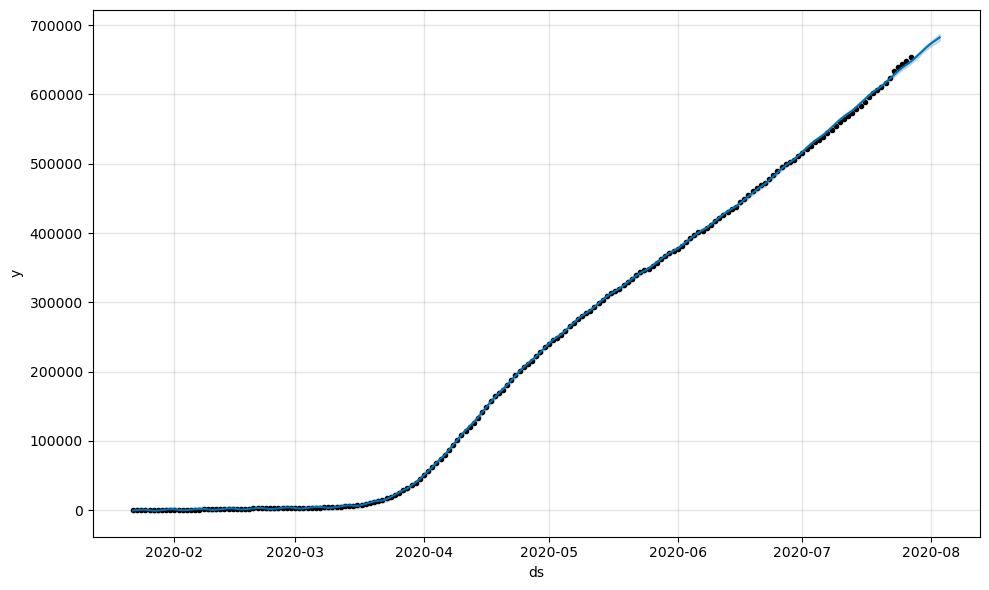

In [52]:
death_forecast_plot = m.plot(forecast)

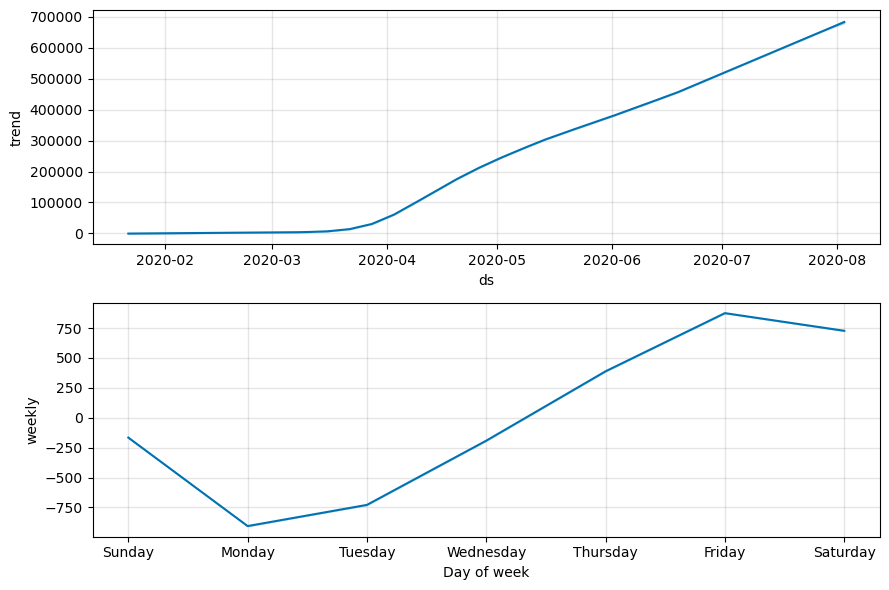

In [53]:
death_forecast_plot = m.plot_components(forecast)

## Forecast on recovered cases

In [54]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

m = Prophet(interval_width=0.95)  
m.fit(recovered) 

future = m.make_future_dataframe(periods=7,freq='D')

forecast = m.predict(future)  
forecast[['ds','yhat','yhat_lower','yhat_upper']].head(10)

20:25:10 - cmdstanpy - INFO - Chain [1] start processing
20:25:10 - cmdstanpy - INFO - Chain [1] done processing


ds          yhat     yhat_lower     yhat_upper
0 2020-01-22 -16897.722302 -132189.528654  104938.267512
1 2020-01-23  -9717.577186 -125597.438128  104953.848602
2 2020-01-24  -3787.699591 -126293.803965  111913.901052
3 2020-01-25    877.777084 -115902.911738  120375.693093
4 2020-01-26  -8687.512311 -132122.478765  108804.079502
5 2020-01-27  -7736.858869 -126443.509069  107352.542322
6 2020-01-28 -15954.269462 -124755.072918  100725.428535
7 2020-01-29  -9398.367596 -124730.775443  114864.497101
8 2020-01-30  -2218.225572 -119499.980046  114212.574662
9 2020-01-31   3711.648931 -111423.017675  112653.533941

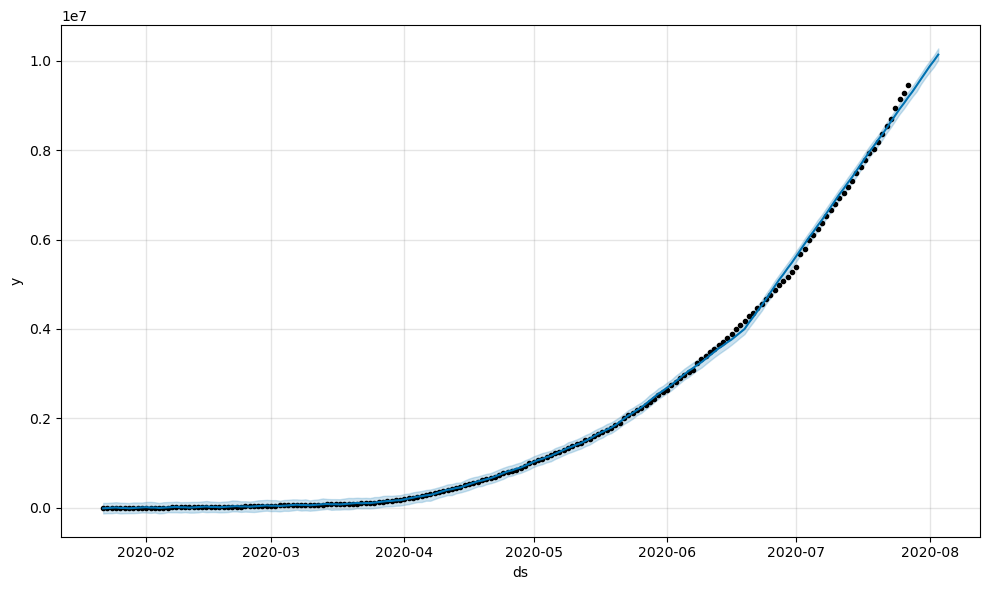

In [55]:
recovered_forecast_plot = m.plot(forecast)

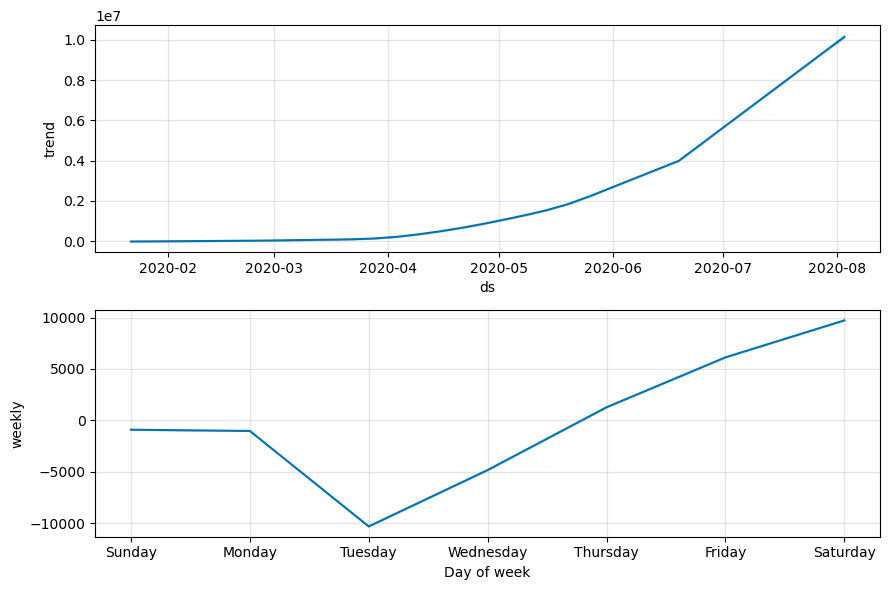

In [56]:
recovered_forecast_plot = m.plot_components(forecast)

# Evaluation of the model

In [57]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [58]:
df_cv = cross_validation(m, initial='90 days', period='30 days', horizon='30 days')

  0%|          | 0/3 [00:00<?, ?it/s]

20:25:12 - cmdstanpy - INFO - Chain [1] start processing
20:25:12 - cmdstanpy - INFO - Chain [1] done processing
20:25:13 - cmdstanpy - INFO - Chain [1] start processing
20:25:13 - cmdstanpy - INFO - Chain [1] done processing
20:25:13 - cmdstanpy - INFO - Chain [1] start processing
20:25:13 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
df_p = performance_metrics(df_cv)
print(df_p)

   horizon           mse          rmse           mae      mape     mdape  \
0   3 days  1.300772e+10  1.140514e+05  1.057057e+05  0.043313  0.045074   
1   4 days  1.756921e+10  1.325489e+05  1.253738e+05  0.051836  0.061037   
2   5 days  3.611317e+10  1.900347e+05  1.668049e+05  0.061550  0.066422   
3   6 days  5.607287e+10  2.367971e+05  2.067322e+05  0.070365  0.075100   
4   7 days  8.691812e+10  2.948188e+05  2.564655e+05  0.080183  0.080477   
5   8 days  1.095877e+11  3.310404e+05  2.863271e+05  0.086412  0.087656   
6   9 days  1.352875e+11  3.678145e+05  3.177853e+05  0.092826  0.092082   
7  10 days  1.574951e+11  3.968565e+05  3.424700e+05  0.097788  0.097248   
8  11 days  1.926737e+11  4.389461e+05  3.801351e+05  0.106014  0.102613   
9  12 days  2.331410e+11  4.828468e+05  4.200248e+05  0.114148  0.114017   
10 13 days  2.773472e+11  5.266376e+05  4.625280e+05  0.123289  0.121394   
11 14 days  3.130774e+11  5.595332e+05  4.920099e+05  0.128171  0.124816   
12 15 days  

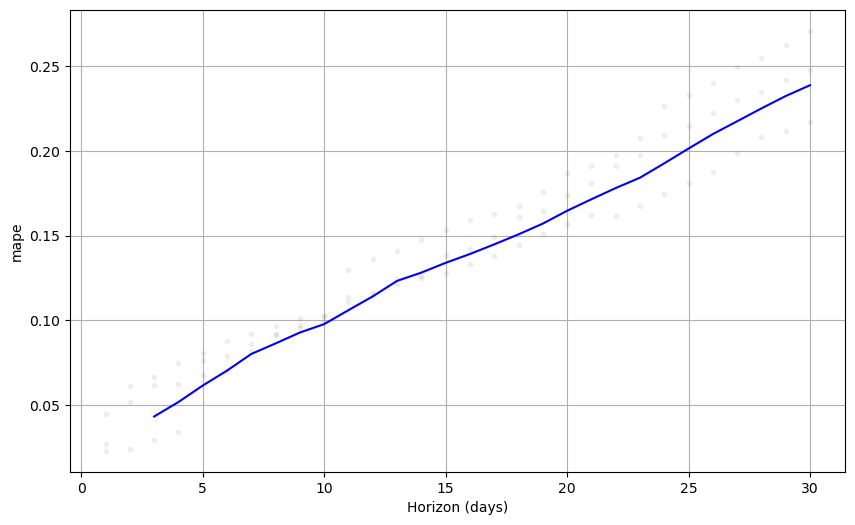

In [60]:
plot_cross_validation_metric(df_cv, metric='mape')